In [1]:
import pandas as pd
import numpy as np

import importlib
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.model_selection import  train_test_split
from sklearn.model_selection import GridSearchCV

import pickle

import gzip

In [2]:
import os
os.chdir('../')
from functions.model_wrapper import Tree_Model, rfm_params

In [3]:
with gzip.open('data/gzipX_train_transformed.pckl', 'rb') as f:
    X_train_transformed = pickle.load(f)
with gzip.open('data/gzipX_val_transformed.pckl', 'rb') as f:
    X_val_transformed = pickle.load(f)  
with gzip.open('data/gzipX_holdout_transformed.pckl', 'rb') as f:
    X_holdout_transformed = pickle.load(f)  


with gzip.open('data/gzipy_train.pckl', 'rb') as f:
    y_train = pickle.load(f)
with gzip.open('data/gzipy_val.pckl', 'rb') as f:
    y_val = pickle.load(f)
with gzip.open('data/gzipy_holdout.pckl', 'rb') as f:
    y_holdout = pickle.load(f)

In [4]:
# For the purpose of Grid Search, I recreate the full data set to use.
X_all = pd.concat([X_train_transformed, X_val_transformed, X_holdout_transformed])
y_all = pd.concat([y_train, y_val, y_holdout])

In [5]:
parameters = {'max_depth' : [250, 500, 1000],
              'max_features' : [0.7, 0.6, 0.5, 'sqrt', 'log2'],
             }
# I reduced the number of estimators and n_jobs for grid search
rfm_params["n_estimators"] = 40
rfm_params["n_jobs"] = 4

In [8]:

rfm = RandomForestRegressor()
rfm.set_params(**rfm_params)
clf_rmse = GridSearchCV(rfm, parameters, scoring = 'neg_root_mean_squared_error', cv = 2)
clf_rmse.fit(X_val_transformed, y_val.values)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    2.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    2.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    1.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]

GridSearchCV(cv=2,
             estimator=RandomForestRegressor(max_depth=300, max_features='sqrt',
                                             n_estimators=40, n_jobs=4,
                                             oob_score=True, verbose=1),
             param_grid={'max_depth': [250, 500, 1000],
                         'max_features': [0.7, 0.6, 0.5, 'sqrt', 'log2']},
             scoring='neg_root_mean_squared_error')

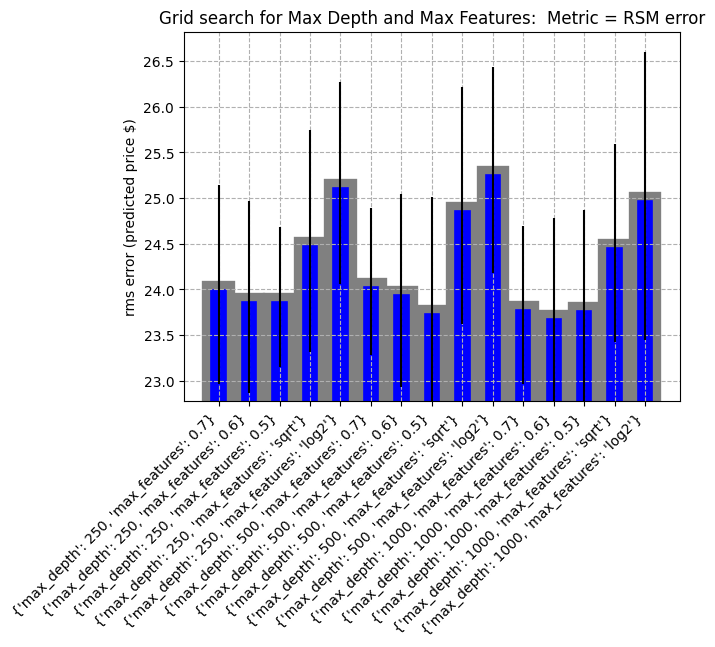

In [12]:
plt.title("Grid search for Max Depth and Max Features:  Metric = RSM error")
xlabels = [x for x in map(str, clf_rmse.cv_results_["params"])]
plt.bar(xlabels, 
        height = -clf_rmse.cv_results_["mean_test_score"],
        yerr=clf_rmse.cv_results_["std_test_score"],
        color = ['blue'],
        edgecolor = ['grey'],
        linewidth = 6
       )
plt.ylabel("rms error (predicted price $)")
plt.xticks(rotation = 45, horizontalalignment="right")
plt.ylim(-clf_rmse.cv_results_["mean_test_score"].min()*0.9, -clf_rmse.cv_results_["mean_test_score"].max()*1.13)
plt.grid(linestyle = "--")
plt.show()

In [13]:
# Use R^2 as a metric for grid search
clf_r2 = GridSearchCV(rfm, parameters, scoring = 'r2', cv = 2)
clf_r2.fit(X_val_transformed, y_val.values)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    2.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    2.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    1.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]

GridSearchCV(cv=2,
             estimator=RandomForestRegressor(max_depth=300, max_features='sqrt',
                                             n_estimators=40, n_jobs=4,
                                             oob_score=True, verbose=1),
             param_grid={'max_depth': [250, 500, 1000],
                         'max_features': [0.7, 0.6, 0.5, 'sqrt', 'log2']},
             scoring='r2')

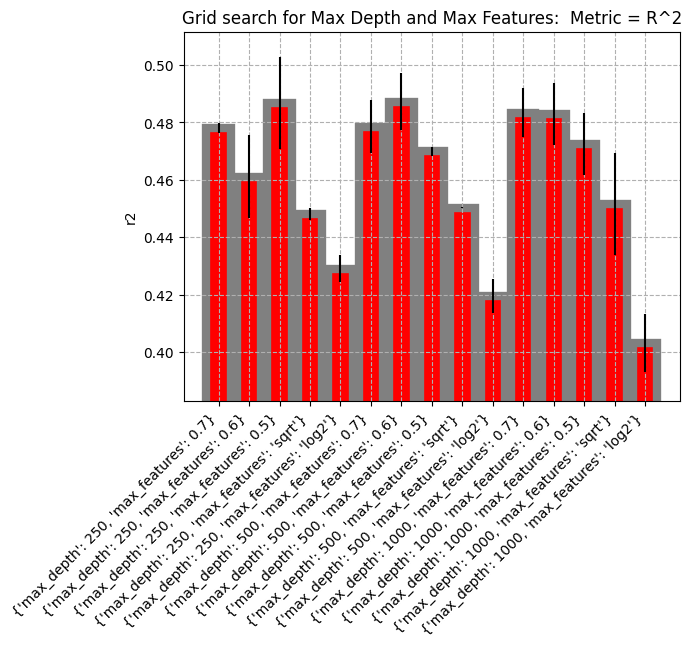

In [14]:
plt.title("Grid search for Max Depth and Max Features:  Metric = R^2")
plt.bar(xlabels, 
        clf_r2.cv_results_["mean_test_score"], 
        yerr=clf_r2.cv_results_["std_test_score"],
        color = ['r'],
        edgecolor = ['grey'],
        linewidth = 6
       )
plt.ylabel(clf_r2.scoring)
plt.xticks(rotation = 45, horizontalalignment="right")
plt.ylim(clf_r2.cv_results_["mean_test_score"].min()*0.95, clf_r2.cv_results_["mean_test_score"].max()*1.05)
plt.grid(linestyle = "--")
plt.show()

## Grid Search Results
#### There are two somewhat surprising results.
#### 1.  Too high a Max Depth would offer lead to overfit models. However in our case, it appears that this makes very little difference.   Perhaps this is because there are so many columns of features (>3000).  Since it makes little difference, we are going with the smallest <em>max_depth</em> of 250.

#### 2.  The <em>max_feature</em> parameter adjust the max number of features allowed in each tree.  This is a method of <em>regularization</em> to avoid the over-reliance on the strong features.  We have about 3000 features, so the log2 and sqrt values are 12 and 55 respectively.  These yielded poorer results than the higher numerical results.  

#### At the end, I selected <em>max_depth</em> = 250 and <em>max_feature</em> = 0.5 because that combination yielded the highest r2 and 3rd lowest rms error of the parameter combination in this search.


In [16]:
rfm_params["n_estimators"] = 2000
rfm_params["n_jobs"] = 4
rfm_params["max_depth"] = 250
rfm_params["max_features"] = 0.5

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  1.5min
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  6.6min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed: 15.5min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed: 27.9min
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed: 44.0min
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed: 63.5min
[Parallel(n_jobs=4)]: Done 2000 out of 2000 | elapsed: 71.0min finished


Finished fitting.  Predicting X...


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    4.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    9.2s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:   16.2s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:   25.8s
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed:   36.8s
[Parallel(n_jobs=4)]: Done 2000 out of 2000 | elapsed:   41.2s finished


Finished predicting X.
Training MdAPE is 6.923663652170793% (not holdout).
Finished training mdoel
Plotting scatter plot..
R2: 0.882, RMSE: 14.402, MAE: 4.057


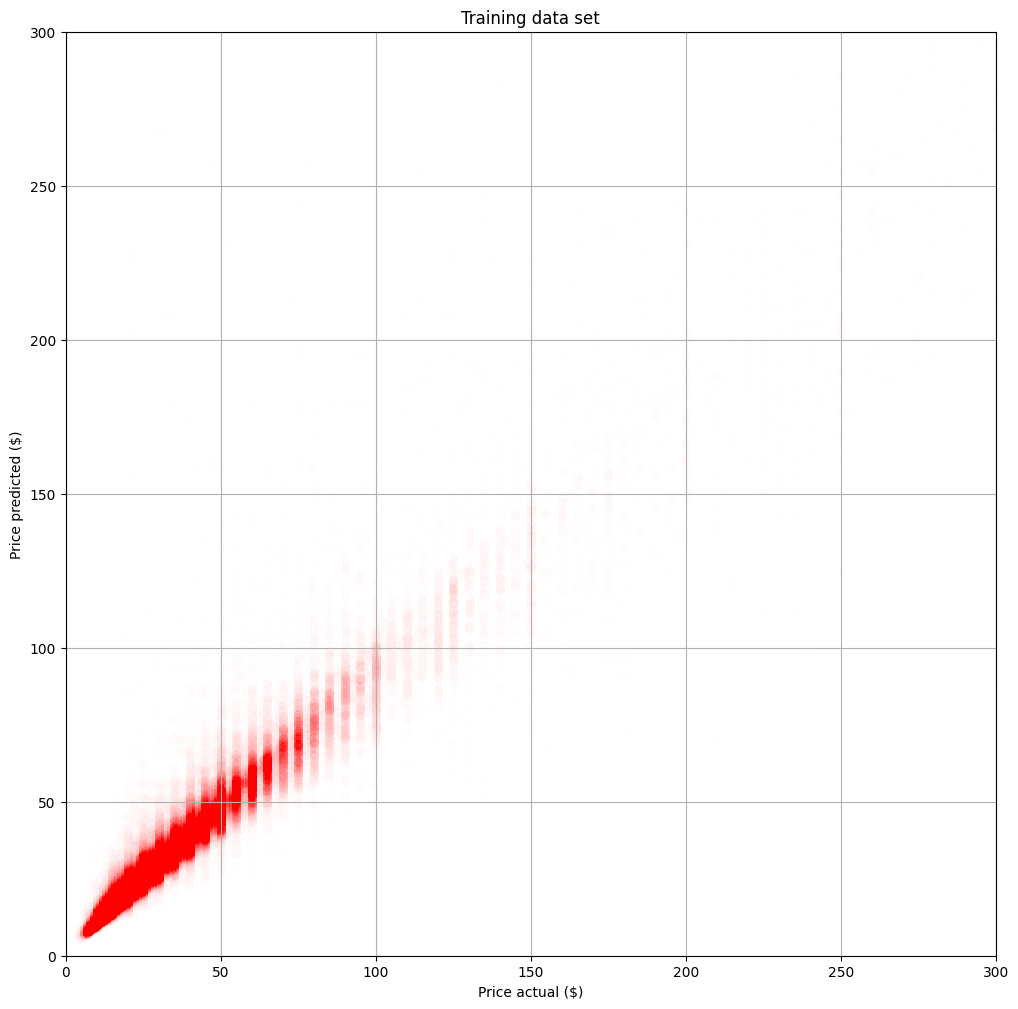

RandomForestRegressor(max_depth=250, max_features=0.5, n_estimators=2000,
                      n_jobs=4, oob_score=True, verbose=1)

In [18]:
rfm = Tree_Model(Model = RandomForestRegressor,
                 params = rfm_params
                 )

rfm.fit(X_train_transformed, y_train)

In [19]:
with open('data/rfm_model_2000.pckl', 'wb') as f:
    pickle.dump(rfm, f)

# with open('data/gbm_model_2000.pckl', 'rb') as f:
#     gbm = pickle.load(f)

In [20]:
trained_xgboost_model = rfm.model

In [23]:
feature_importances = rfm.feature_imp
with open('data/feature_importances_rfm2000.pckl', 'wb') as f:
    pickle.dump(feature_importances, f)

<class 'pandas.core.series.Series'>
type(y_actual) = <class 'pandas.core.series.Series'>
type(y_actual) = <class 'pandas.core.series.Series'>
self.y_data_type = <class 'pandas.core.series.Series'>


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    3.6s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    6.3s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:    9.5s
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed:   13.4s


MdAPE is 18.43864285714286%
Plotting scatter plot..
R2: 0.370, RMSE: 31.283, MAE: 10.426


[Parallel(n_jobs=4)]: Done 2000 out of 2000 | elapsed:   15.5s finished


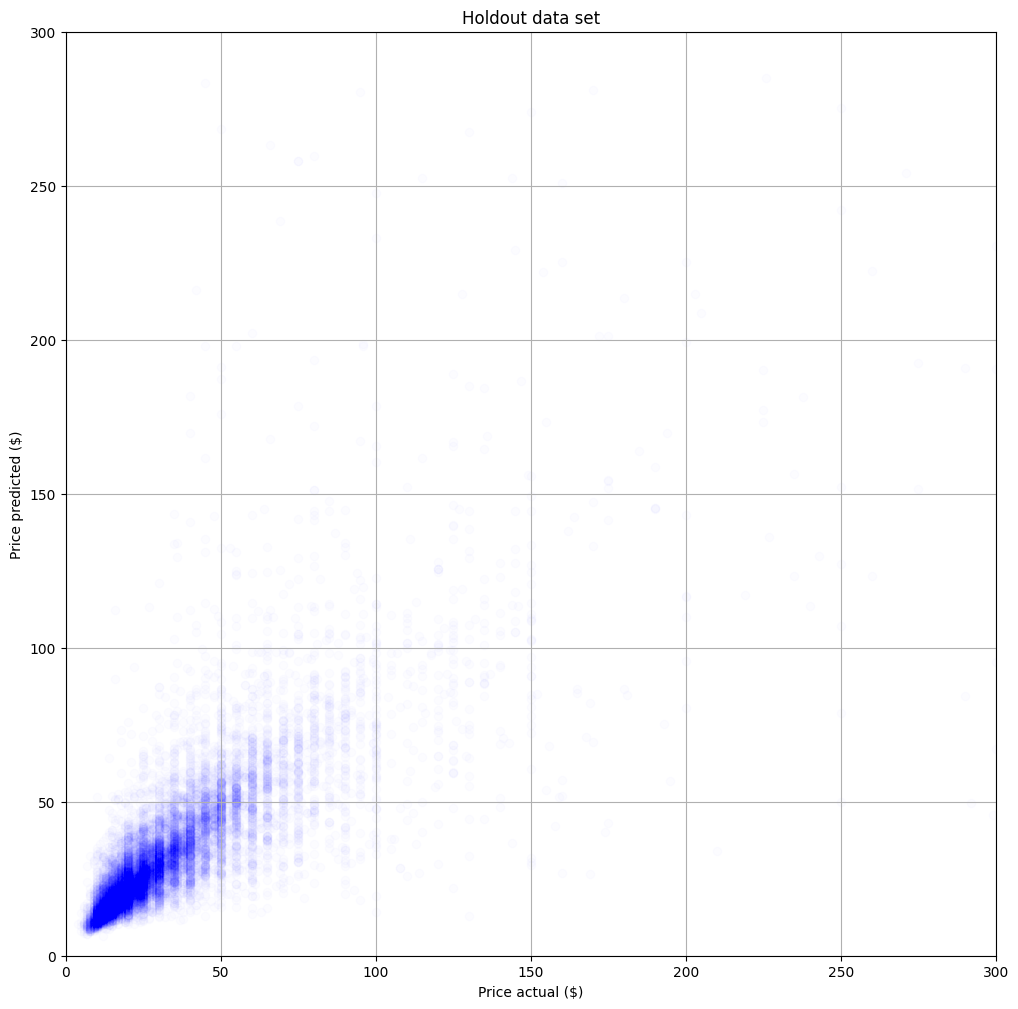

In [24]:
y_pred = rfm.predict(X_holdout_transformed, y_holdout)